# About Notebook:

In this notebook, I remove outliers through `iqr method` because data was `skewed`. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Datasets/placement.csv")

In [3]:
df.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


In [4]:
df.rename(columns={"placement_exam_marks":"exam_marks"}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cgpa        1000 non-null   float64
 1   exam_marks  1000 non-null   float64
 2   placed      1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
df.describe()

,cgpa,exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [7]:
df.shape

(1000, 3)

In [8]:
df.isnull().sum()

cgpa          0
exam_marks    0
placed        0
dtype: int64

In [9]:
df.duplicated().sum()

19

Text(0.5, 1.0, 'placement exam marks')

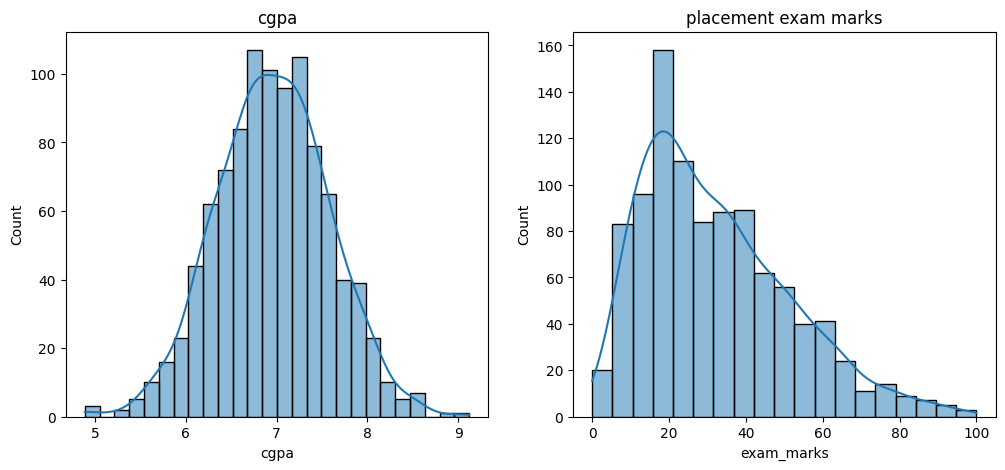

In [10]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

sns.histplot(df["cgpa"], kde=True, ax=ax1)
ax1.set_title("cgpa")

sns.histplot(df["exam_marks"], kde=True, ax=ax2)
ax2.set_title("placement exam marks")

In [11]:
df['exam_marks'].skew()

0.8356419499466834

<Axes: >

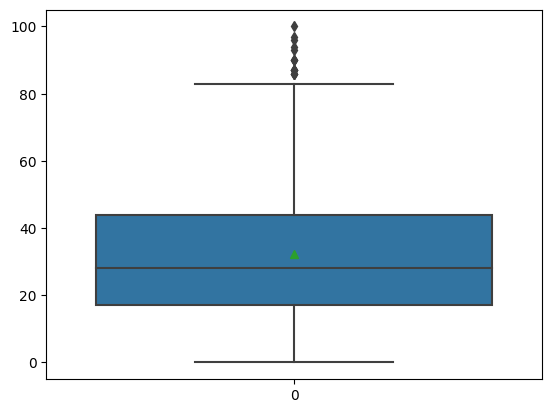

In [12]:
sns.boxplot(df["exam_marks"], showmeans=True)

In [13]:
Q1 = df['exam_marks'].quantile(0.25)
Q3 = df['exam_marks'].quantile(0.75)
iqr = Q3-Q1

In [14]:
Q1, Q3, iqr

(17.0, 44.0, 27.0)

In [15]:
lower_limit = Q1-1.5*iqr
upper_limit = Q3+1.5*iqr

In [16]:
lower_limit, upper_limit

(-23.5, 84.5)

In [17]:
df.loc[df['exam_marks']<lower_limit, :]

,cgpa,exam_marks,placed


In [18]:
df.loc[df['exam_marks']>upper_limit, :]

,cgpa,exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Trimming

In [19]:
new_df = df.loc[((df['exam_marks']>lower_limit) & (df['exam_marks']<upper_limit)), :]

In [20]:
new_df

,cgpa,exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


Text(0.5, 1.0, 'exam_marks box-plot')

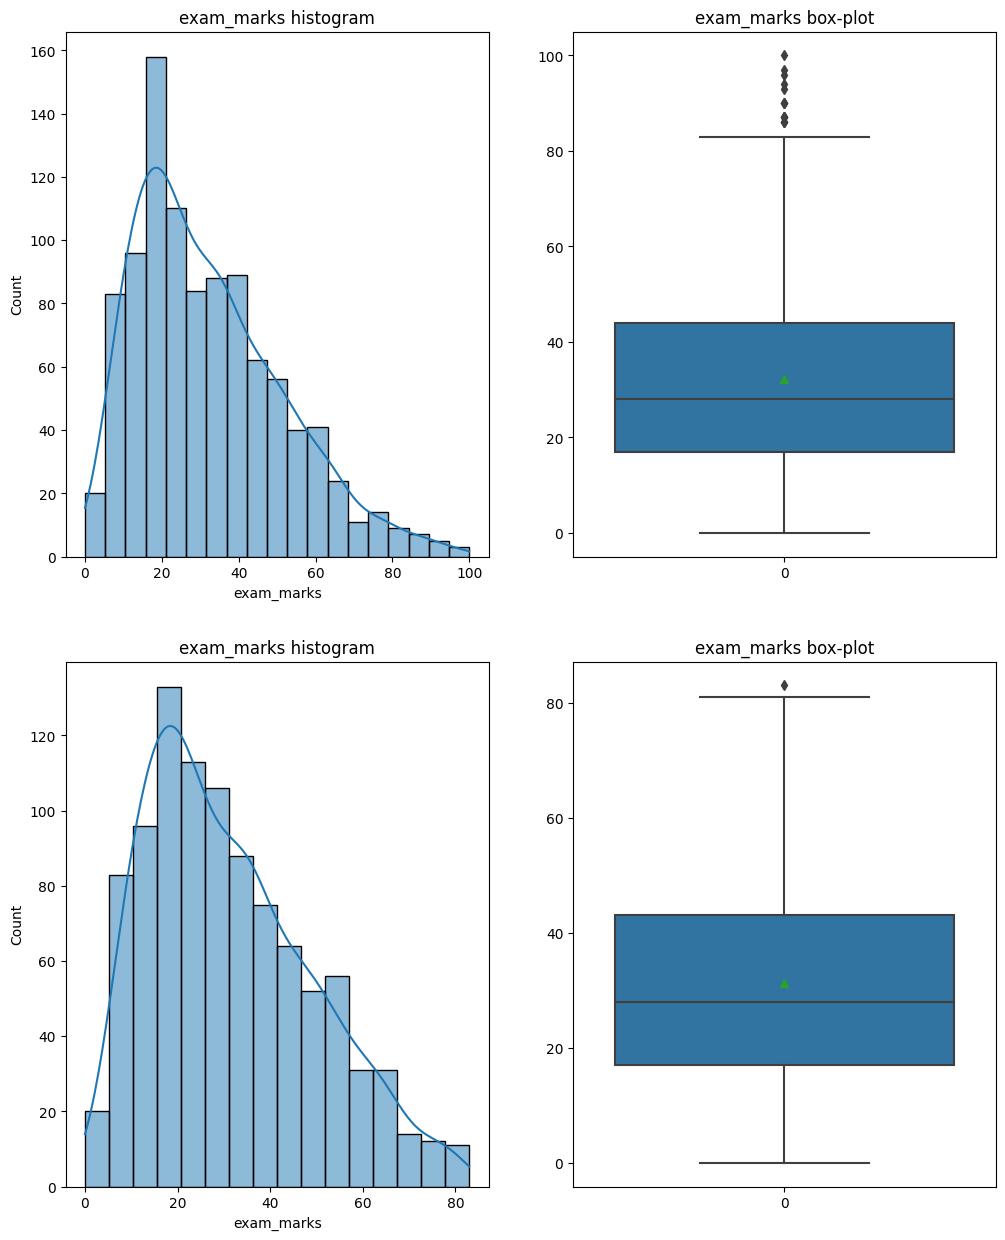

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,15))

# Before applying IQR method"
sns.histplot(df['exam_marks'], kde=True, ax=axes[0,0])
axes[0,0].set_title("exam_marks histogram")

sns.boxplot(df['exam_marks'], ax=axes[0,1], showmeans=True)
axes[0,1].set_title("exam_marks box-plot")

# After applying IQR method"
sns.histplot(new_df['exam_marks'], kde=True, ax=axes[1,0])
axes[1,0].set_title("exam_marks histogram")

sns.boxplot(new_df['exam_marks'], ax=axes[1,1], showmeans=True)
axes[1,1].set_title("exam_marks box-plot")

# Capping

In [22]:
df2 = df.copy()

df2['exam_marks'] = np.where(
    df['exam_marks']<lower_limit,
    lower_limit, #True
    np.where( #False
        df['exam_marks']>upper_limit,
        upper_limit, #True
        df['exam_marks'] #False
    )
)

In [23]:
df2.shape

(1000, 3)

Text(0.5, 1.0, 'exam_marks box-plot')

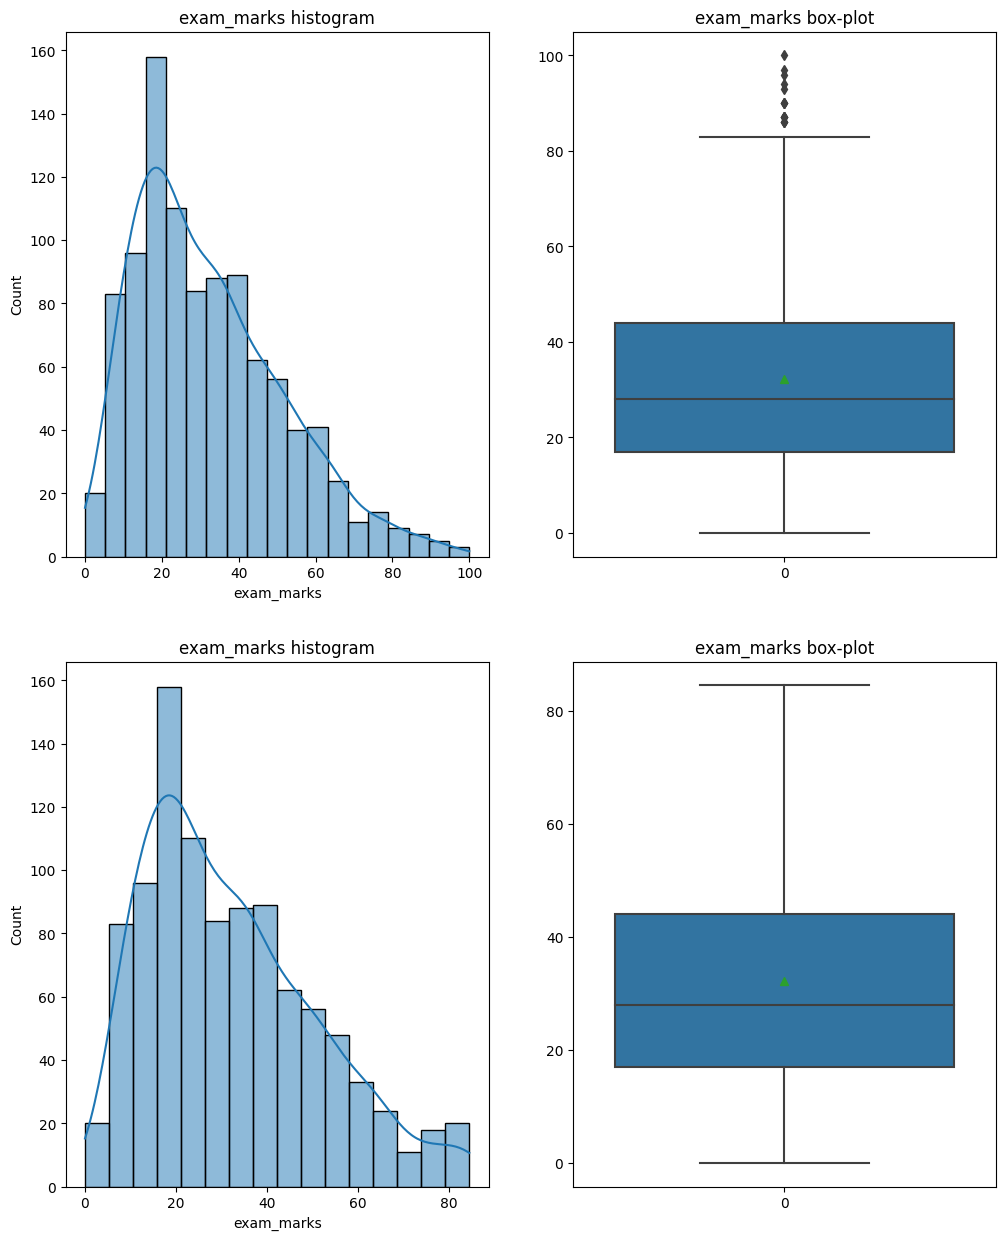

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,15))

# Before applying IQR method"
sns.histplot(df['exam_marks'], kde=True, ax=axes[0,0])
axes[0,0].set_title("exam_marks histogram")

sns.boxplot(df['exam_marks'], ax=axes[0,1], showmeans=True)
axes[0,1].set_title("exam_marks box-plot")

# After applying IQR method"
sns.histplot(df2['exam_marks'], kde=True, ax=axes[1,0])
axes[1,0].set_title("exam_marks histogram")

sns.boxplot(df2['exam_marks'], ax=axes[1,1], showmeans=True)
axes[1,1].set_title("exam_marks box-plot")

# check this method on `normal distributed data`

In [25]:
lower_limit = df['exam_marks'].mean()-3*df['exam_marks'].std()
upper_limit = df['exam_marks'].mean()+3*df['exam_marks'].std()

In [26]:
lower_limit, upper_limit

(-25.167467016763247, 89.61746701676324)

In [27]:
df.loc[df['exam_marks']<lower_limit , :]

,cgpa,exam_marks,placed


In [28]:
df.loc[df['exam_marks']>upper_limit , :]

,cgpa,exam_marks,placed
9,7.75,94.0,1
134,6.33,93.0,0
162,7.80,90.0,0
324,6.64,90.0,0
630,6.56,96.0,1
730,6.14,90.0,1
846,6.99,97.0,0
917,5.95,100.0,0


### Outcome:

If data is `skewed`, then we should need to apply `iqr method` but here I try to apply `z-score method` on skewed data. So result was different. With iqr method, outliers was `15 rows` but with z-score, outliers was `8 rows`